In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (recall_score, precision_score, confusion_matrix, precision_recall_curve, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
frauds = pd.read_csv("./assets/fraud_data.csv")

In [7]:
frauds.Class.mean()

0.016410823768035772

In [8]:
def answer_one():
    frauds = pd.read_csv("./assets/fraud_data.csv")
    return frauds.Class.mean()

In [9]:
answer_one()

0.016410823768035772

In [14]:
# Use X_train, X_test, y_train, y_test for all of the following questions
df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [15]:
def answer_two():
    dmmClassifier = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
    return dmmClassifier.score(X_test, y_test), recall_score(y_test, dmmClassifier.predict(X_test))
    

In [16]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [18]:
def answer_three():
    svc = SVC().fit(X_train, y_train)
    preds = svc.predict(X_test)
    return svc.score(X_test, y_test), recall_score(y_test, preds), precision_score(y_test, preds)
    

In [19]:
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [21]:
svc = SVC(C = 1e9, gamma = 1e-7).fit(X_train, y_train)

In [27]:
np.array(svc.decision_function(X_test) > -220, dtype = np.int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
confusion_matrix()

In [28]:
def answer_four():
    svc = SVC(C = 1e9, gamma = 1e-7).fit(X_train, y_train)
    preds_min200threshold = np.array(svc.decision_function(X_test) > -220, dtype = np.int64)
    return confusion_matrix(y_test, preds_min200threshold)

In [29]:
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [63]:
logReg = LogisticRegression(max_iter = 1000, solver = "liblinear").fit(X_train, y_train)

In [64]:
logReg.classes_

array([0, 1], dtype=int64)

In [65]:
logReg.predict_proba(X_test)[:, 1]

array([0.0012509 , 0.00145784, 0.00249531, ..., 0.00213747, 0.00041293,
       0.00197765])

In [66]:
precision, recall, _ = precision_recall_curve(y_test, logReg.predict_proba(X_test)[:, 1])

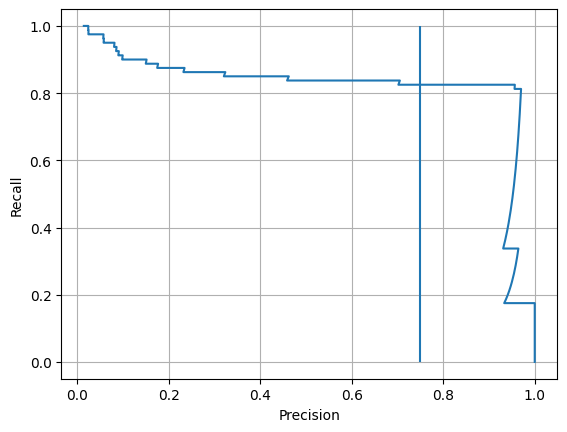

In [67]:
fig, axes = plt.subplots()
axes.plot(precision, recall)
axes.vlines(x = 0.75, ymin = 0, ymax = 1)
axes.set_xlabel("Precision")
axes.set_ylabel("Recall")
axes.grid(which = "both")
plt.show()

In [69]:
recall[np.where(precision == 0.75)]

array([0.825])

In [70]:
fpr, tpr, _ = roc_curve(y_test, logReg.predict_proba(X_test)[:, 1])

In [74]:
fpr[np.where(fpr == 0.16)]

array([], dtype=float64)

In [73]:
fpr[np.where(fpr == 0.61)]

array([], dtype=float64)

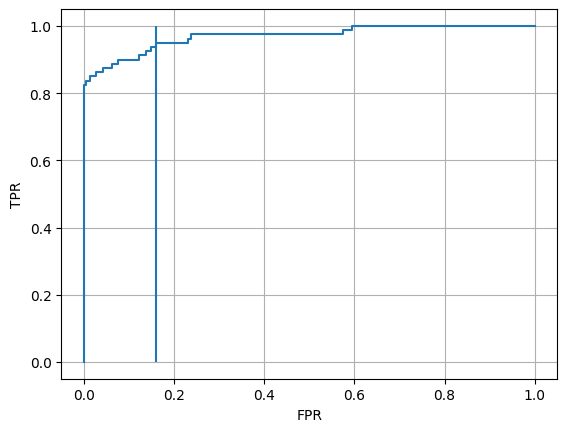

In [75]:
fig, axes = plt.subplots()
axes.plot(fpr, tpr)
axes.vlines(x = 0.16, ymin = 0, ymax = 1)
axes.set_xlabel("FPR")
axes.set_ylabel("TPR")
axes.grid(which = "both")
plt.show()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [81]:
params = {"penalty": ['l1', 'l2'], "C":[0.01, 0.1, 1, 10]}
logReg = LogisticRegression(solver = "liblinear")

In [83]:
classifier_grid = GridSearchCV(logReg, param_grid = params, cv = 3)
classifier_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [86]:
classifier_grid.cv_results_

{'mean_fit_time': array([0.02624265, 0.05489119, 0.02784475, 0.07880576, 0.06825987,
        0.09962821, 0.1624306 , 0.13102158]),
 'std_fit_time': array([7.42945159e-03, 6.61935142e-03, 2.34301362e-03, 9.36270566e-05,
        7.19874183e-03, 1.47070751e-02, 6.59950057e-02, 2.66626840e-02]),
 'mean_score_time': array([0.00520539, 0.00039689, 0.        , 0.00518854, 0.00522415,
        0.        , 0.        , 0.        ]),
 'std_score_time': array([0.00736154, 0.00056128, 0.        , 0.00733771, 0.00738806,
        0.        , 0.        , 0.        ]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'penal

In [89]:
# [{'C': 0.01, 'penalty': 'l1'},
#  {'C': 0.01, 'penalty': 'l2'},
#  {'C': 0.1, 'penalty': 'l1'},
#  {'C': 0.1, 'penalty': 'l2'},
#  {'C': 1, 'penalty': 'l1'},
#  {'C': 1, 'penalty': 'l2'},
#  {'C': 10, 'penalty': 'l1'},
#  {'C': 10, 'penalty': 'l2'}]


classifier_grid.cv_results_["mean_test_score"]

array([0.99422214, 0.99539001, 0.99606614, 0.99618907, 0.99606614,
       0.9961276 , 0.99588174, 0.9959432 ])

In [90]:
classifier_grid.cv_results_["mean_test_score"].reshape(4, 2)

array([[0.99422214, 0.99539001],
       [0.99606614, 0.99618907],
       [0.99606614, 0.9961276 ],
       [0.99588174, 0.9959432 ]])

![](./matrix.png)

In [91]:
def answer_six():    
    params = {"penalty": ['l1', 'l2'], "C":[0.01, 0.1, 1, 10]}
    logReg = LogisticRegression(solver = "liblinear")
    classifier_grid = GridSearchCV(logReg, param_grid = params, cv = 3)
    classifier_grid.fit(X_train, y_train)
    return classifier_grid.cv_results_["mean_test_score"].reshape(4, 2)

In [93]:
answer_six()

array([[0.99422214, 0.99539001],
       [0.99606614, 0.99618907],
       [0.99606614, 0.9961276 ],
       [0.99588174, 0.9959432 ]])

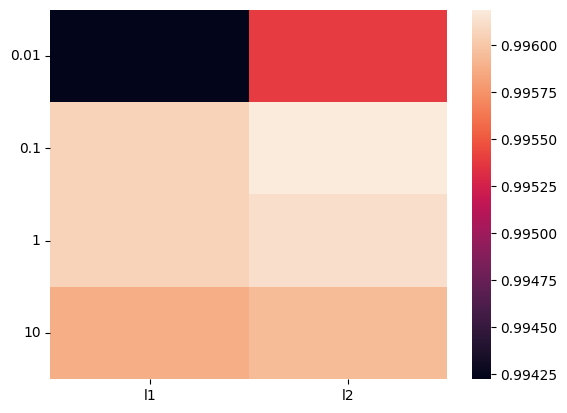

In [94]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    # %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())